In [6]:
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

general code for webcam input from media pipe

In [7]:
cap = cv2.VideoCapture(0)
with mp_hands.Hands(
    model_complexity=0,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as hands:
  while cap.isOpened():
    success, image = cap.read()
    if not success:
      print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
      continue

    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = hands.process(image)

    # Draw the hand annotations on the image.
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    if results.multi_hand_landmarks:
      for hand_landmarks in results.multi_hand_landmarks:
        mp_drawing.draw_landmarks(
            image,
            hand_landmarks,
            mp_hands.HAND_CONNECTIONS,
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style())
    # Flip the image horizontally for a selfie-view display.
    cv2.imshow('MediaPipe Hands', cv2.flip(image, 1))
    if cv2.waitKey(5) & 0xFF == 27:
      break
cap.release()

take photo with webcam and save the landmarks 

Handedness: [classification {
  index: 0
  score: 0.9853220582008362
  label: "Left"
}
]
hand_landmarks: landmark {
  x: 0.2559114098548889
  y: 0.8363952040672302
  z: 3.770906573663524e-07
}
landmark {
  x: 0.21607372164726257
  y: 0.7618522047996521
  z: -0.00443768547847867
}
landmark {
  x: 0.19838207960128784
  y: 0.6653221249580383
  z: -0.01612493023276329
}
landmark {
  x: 0.1791306734085083
  y: 0.5812146663665771
  z: -0.029570234939455986
}
landmark {
  x: 0.16386578977108002
  y: 0.5244061946868896
  z: -0.04186778515577316
}
landmark {
  x: 0.26302865147590637
  y: 0.5832998156547546
  z: -0.02143470011651516
}
landmark {
  x: 0.27972131967544556
  y: 0.4571434259414673
  z: -0.03827029466629028
}
landmark {
  x: 0.29114893078804016
  y: 0.37812352180480957
  z: -0.047748059034347534
}
landmark {
  x: 0.3014850914478302
  y: 0.32224854826927185
  z: -0.05248575657606125
}
landmark {
  x: 0.2995642423629761
  y: 0.5988370180130005
  z: -0.028058739379048347
}
landmark {
  

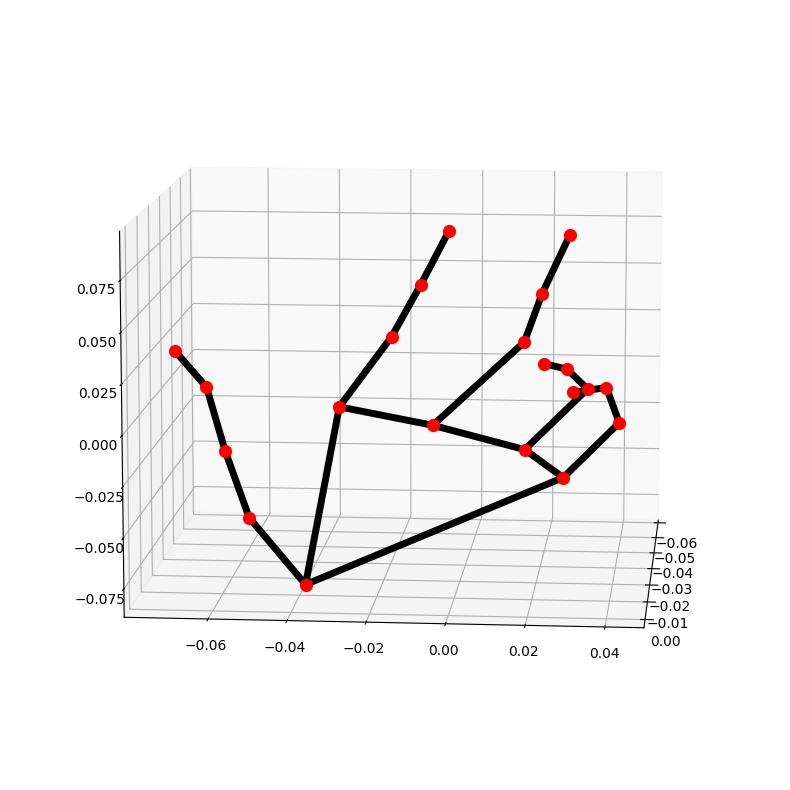

In [5]:
import cv2
import mediapipe as mp
import os
import pickle

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

def capture_hand_landmarks(num_photos):
    cap = cv2.VideoCapture(0)
    with mp_hands.Hands(
        model_complexity=0,
        min_detection_confidence=0.5,
        min_tracking_confidence=0.5) as hands:
        photo_count = 0
        while photo_count < num_photos:
            # Capture a frame from the camera
            ret, frame = cap.read()
            if not ret:
                continue

            # Display the frame
            cv2.imshow("Capture Frame", frame)

            # Check if the user wants to take a photo
            key = cv2.waitKey(1)
            if key == ord(" "):
                # Take a photo
                image_path = f"C:\Users\benja\Documents\CV\CV\hand_commands\images_{photo_count}.jpg"
                cv2.imwrite(image_path, frame)

                # Get the landmarks of the hand
                image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                results = hands.process(image)
                if results.multi_hand_landmarks:
                    landmarks = results.multi_hand_landmarks[0]
                    landmarks_dict = {}
                    for index, landmark in enumerate(landmarks.landmark):
                        landmarks_dict[index] = (landmark.x, landmark.y, landmark.z)

                    # Save the landmarks to a file
                    landmarks_path = f"C:\Users\benja\Documents\CV\CV\hand_commands\landmarks_{photo_count}.pickle"
                    os.makedirs(os.path.dirname(landmarks_path), exist_ok=True)
                    with open(landmarks_path, "wb") as f:
                        pickle.dump(landmarks_dict, f)

                print(f"Photo {photo_count + 1} and hand landmarks saved to disk.")
                photo_count += 1

        # Release the camera and destroy the windows
        cap.release()
        cv2.destroyAllWindows()
